In [21]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
def see_image(img_path):
    """
    Baca dan tampilkan gambar menggunakan matplotlib (untuk Jupyter)
    """
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error: Tidak bisa membaca file {img_path}")
        return
    
    # Convert BGR to RGB untuk matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"Image: {Path(img_path).name}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Image shape: {img.shape}")
    print(f"✓ Data type: {img.dtype}")

# Test membaca gambar

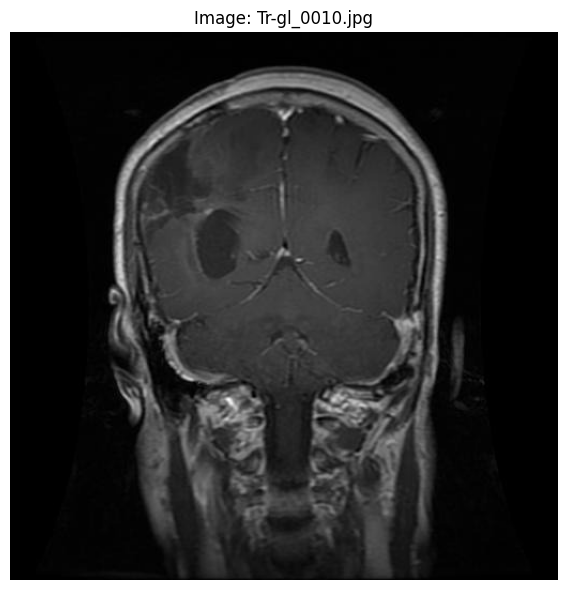

✓ Image shape: (512, 512, 3)
✓ Data type: uint8


In [22]:
img_path = "D:/MakalahAlgeo2/Tumor-Detection-Optimization-using-FFT/dataset/Training/glioma/Tr-gl_0010.jpg"
see_image(img_path)

In [23]:
import cv2

# Read the image file
# The result is a NumPy array (matrix)
img_as_matrix = cv2.imread(img_path)

# Display the resulting matrix shape
print(f"Image shape: {img_as_matrix.shape}")

Image shape: (512, 512, 3)


In [48]:
img_as_matrix[:,:,3]

IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
def run_convolution_manual(image, kernel):

    img_h, img_w, img_c = image.shape  
    ker_h, ker_w, ker_c = kernel.shape  
    
    # Output size: N - K + 1
    out_h = img_h - ker_h + 1
    out_w = img_w - ker_w + 1
    
    result = np.zeros((out_h, out_w), dtype=np.float32)
    
    
    # Sliding window
    for m in range(out_h):
        for n in range(out_w):
            # Extract patch untuk semua channel
            patch = image[m:m+ker_h, n:n+ker_w]  # Shape: (Kh, Kw, 3)
            
            # Convolve untuk setiap channel, lalu sujumlahinm
            output_value = 0.0
            
            # Process each RGB channel
            for c in range(img_c):
                patch_channel = patch[:, :, c]      
                kernel_channel = kernel[:, :, c]    
                
        
                convolved_channel = np.sum(patch_channel * kernel_channel)
                output_value += convolved_channel
            
            result[m, n] = output_value
    
    total_ops = out_h * out_w * ker_h * ker_w * img_c
    
    
    return result

In [94]:
import numpy as np
kernel = np.random.rand(3,3,3)

In [75]:
kernel = np.array(
    [
        [
            [1,2,4],
            [2,3,7],
            [4,2,1]
        ],
        [[1,2,4],
        [2,3,7],
        [4,2,1]],
        [[1,2,4],
        [2,3,7],
        [4,2,1]]
    ]
)

In [90]:
kernel = np.array(
    [
        [
            [0,0,0],
            [0,1,0],
            [0,0,0]
        ],
        [[0,0,20],
            [0,0,0],
            [0,0,0]],
        [[0,0,0],
            [0,0,0],
            [0,0,0]]
    ]
)

In [96]:
kernel

array([[[0.86007215, 0.40861453, 0.70617702],
        [0.65922323, 0.0113337 , 0.29113945],
        [0.48561295, 0.59807785, 0.25195359]],

       [[0.69466151, 0.91475684, 0.08186248],
        [0.53121604, 0.48542493, 0.23514455],
        [0.64549557, 0.6959021 , 0.6295997 ]],

       [[0.25816815, 0.28426558, 0.40238149],
        [0.12544113, 0.81110979, 0.87988677],
        [0.72383608, 0.65779956, 0.33814515]]])

In [97]:
new = run_convolution_manual(img_as_matrix,kernel)


🔢 SPATIAL CONVOLUTION (RGB)
   Image shape: (512, 512, 3) (H × W × C)
   Kernel shape: (3, 3, 3) (Kh × Kw × C)
   Output shape: (510, 510)
   Total operations: 510 × 510 × 3 × 3 × 3 = 7,022,700


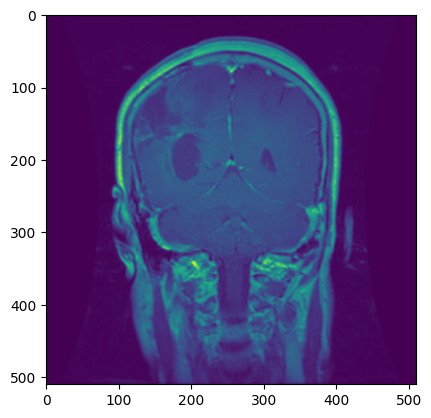

In [98]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(new)

In [ ]:
def CONVLayer():
    